# Assigment 4: Data Analysis and Visualization

Use as many Python and markdown cells per question as you deem necessary. **DO NOT SUBMIT CODE THAT DOES NOT RUN.** You will lose points for code that throws errors. 

The data you will work with was taken from [Alaskan vegetation plots](https://daac.ornl.gov/ABOVE/guides/Arrigetch_Peaks_Veg_Plots.html) from 1978-1981. The data set is in the `data/` subdirectory in this repo in two .csv files containing information about research plots and the plant species covering the plots. **Please read the descriptions for the data, as they will help you answer the questions.** 

**Table 1: Data files**
| Data File Name |	Description |
| --- | --- |
| Arrigetch_Peaks_Environmental_Data.csv| Environmental characterization data for Arrigetch Peaks research plots |
| Arrigetch_Peaks_Species_Data.csv | Species cover data for Arrigetch Peaks research plots|

**Table 2. Arrigetch_Peaks_Environmental_Data.csv**
| Column Name	| Units	| Description |
| --- | --- | --- |
| TURBOVEG_PLOT_NUMBER	 |	 | TURBOVEG plot number |
| PLANT_COMMUNITY_NAME	|  |	Primary vegetation types |
| ELEVATION |	m	| Elevation of the plots |
| ASPECT	| deg	| Aspect of the plots |
| SLOPE	| deg	| Slope of the plots |
| COVER_LITTER_LAYER	| % |	Percentage of litter layer cover in the plot |
|COVER_OPEN_WATER	| % | 	Percentage of open water cover in the plot |
| COVER_ROCK	| % |	Percentage of rock cover in the plot |
| COVER_CRUST	| % |	Percentage of crust cover in the plot |
| COVER_BARE_SOIL	| % |	Percentage of bare soil cover in the plot|
| REMARKS	 |  |	Field notes |

**Table 3. Arrigetch_Peaks_Species_Data.csv**
| Column Name	| Units	| Description |
| --- | --- | --- |
| TURBOVEG_PLOT_NUMBER	 |	 | TURBOVEG plot number |
| species name | | data values are Species Cover Classes: where r (rare), + (common, but less than 1% cover), 1 (1-5 percent), 2 (6 to 25%), 3 (25 to 50%), 4 (51 to 75%), 5 (76 to 100%). |

## Question 1: Pandas (15 pt)

Load the two data sets into Python with Pandas. Name the environmental data frame `env`, and the species data frame `species`. Display the first few rows of each data frame. What are the dimensions of the two data frames? (2 pt)

Replace all values in both data frames that are `-9999` with `np.NaN`. (1 pt)

Print how many unique plant community names there are. (1 pt)

Print summary statistics for all numerical columns in `env`, excluding `"TURBOVEG_PLOT_NUMBER"`. (2 pt)

Merge the two data frames together by the column `TURBO_PLOT_NUMBER`. (1 pt)

How many rows in the merged data frame contain missing data? (1 pt)

Which species was present in the most plots? (3 pt)

For all rows in `species`, calculate the sum of all the columns (excluding `"TURBOVEG_PLOT_NUMBER"`) for each row. Add this sum as a new column called `"totals"`. (2 pt)

Read the description included above for the `species` data frame. Are there any inconsistencies between the description and the data? Explain. If there are inconsistences, what would you do to correct them? (2 pt)

## Question 1 part 1

In [2]:
''' Load the two data sets into Python with Pandas. Name the environmental data frame env.''' 
import pandas as pd 
import numpy as np 
env = pd.read_csv ('Arrigetch_Peaks_Environmental_Data.csv') #works as long as .csv is in the same directory as your jupyter notebook
env.head(5) #display the first few rows of the data frame


,TURBOVEG_PLOT_NUMBER,PLANT_COMMUNITY_NAME,ELEVATION,ASPECT,SLOPE,COVER_LITTER_LAYER,COVER_OPEN_WATER,COVER_ROCK,COVER_CRUST,COVER_BARE_SOIL,REMARKS
0,10925,Ass. Umbilicarietum pensylvanicae-carolinianae,1090,45,-9999,0,0,0,0,0,Crustose and foliose lichen dominated vegetati...
1,10926,Ass. Umbilicarietum pensylvanicae-carolinianae,920,315,-9999,0,0,0,0,0,Crustose and foliose lichen dominated vegetati...
2,10927,Ass. Umbilicarietum pensylvanicae-carolinianae,940,270,-9999,0,0,0,0,0,Crustose and foliose lichen dominated vegetati...
3,10928,Ass. Umbilicarietum pensylvanicae-carolinianae,950,225,-9999,0,0,0,0,0,Umbilicaria arctica = in original Umbilicaria ...
4,10929,Ass. Umbilicarietum pensylvanicae-carolinianae,935,270,-9999,0,0,0,0,0,Crustose and foliose lichen dominated vegetati...


In [3]:
env.shape #what are the dimensions? ---> 439 rows and 11 columns

(439, 11)

In [20]:
species = pd.read_csv('Arrigetch_Peaks_Species_Data.csv') #works as long as .csv is in the same directory as your Jupyter notebook
species.head(5) #Display the first few rows of the data frame

,TURBOVEG_PLOT_NUMBER,Abietinella abietina,Acarospora schleicheri,Aconitum delphinifolium delphinifolium,Alectoria ochroleuca,Parmelia almquistii,Dactylina madreporiformis,Alnus crispa crispa,Amphidium mougeotii,Andreaea blyttii,...,Umbilicaria vellea,Vaccinium uliginosum microphyllum,Vaccinium uliginosum alpinum,Vaccinium vitis-idaea minus,Valeriana capitata,Cetraria tilesii,Wilhelmsia physodes,Woodsia alpina,Woodsia glabella,Xanthoria elegans
0,10925,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
1,10926,0.0,0.0,0.0,6.0,0.0,0.0,0,0,0.0,...,0.5,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
2,10927,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,...,1.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
3,10928,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
4,10929,0.0,0.0,0.0,2.0,1.0,0.0,0,0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0


In [5]:
species.shape #What are the dimensions? ---> 439 rows and 409 columns

(439, 409)

## Question 1 Part 2


First, determine which columns of each dataframe have -9999. Replace the value directly into the same dataframe (not copy of it)

In [6]:
env.isin([-9999]).any() #Columns ELEVATION, ASPECT, and SLOPE have -9999

TURBOVEG_PLOT_NUMBER    False
PLANT_COMMUNITY_NAME    False
ELEVATION                True
ASPECT                   True
SLOPE                    True
COVER_LITTER_LAYER      False
COVER_OPEN_WATER        False
COVER_ROCK              False
COVER_CRUST             False
COVER_BARE_SOIL         False
REMARKS                 False
dtype: bool

#### Use dictionary to specify which columns to replace, the value to replace (-9999) and the common replacement (np.NaN)
#### inplace = True avoids copying the entire dataframe

In [7]:
env.replace({'ELEVATION': -9999, 'ASPECT': -9999, 'SLOPE': -9999}, np.NaN, inplace=True)
env.isin([-9999]).any() #No more -9999 (all FALSE)

TURBOVEG_PLOT_NUMBER    False
PLANT_COMMUNITY_NAME    False
ELEVATION               False
ASPECT                  False
SLOPE                   False
COVER_LITTER_LAYER      False
COVER_OPEN_WATER        False
COVER_ROCK              False
COVER_CRUST             False
COVER_BARE_SOIL         False
REMARKS                 False
dtype: bool

#### Here's how many times the replacement happened in each column of the env dataframe

In [8]:
env.isna().sum()

TURBOVEG_PLOT_NUMBER      0
PLANT_COMMUNITY_NAME      0
ELEVATION                65
ASPECT                  195
SLOPE                   292
COVER_LITTER_LAYER        0
COVER_OPEN_WATER          0
COVER_ROCK                0
COVER_CRUST               0
COVER_BARE_SOIL           0
REMARKS                   0
dtype: int64

#### Since species dataframe is > 400 columns, first search for -9999, then filter the results for just those columns that have it.
#### Evidently, there is nothing to replace in this one.

In [9]:
search = species.isin([-9999]).any()
search[search==True]

Series([], dtype: bool)

## Question 1 Part 3

#### Print how many unique plant community names there are. PLANT_COMMUNITY_NAME is a column in the env dataframe.
### There are 51 Unique Communities.

In [10]:
unique_communities = env['PLANT_COMMUNITY_NAME'].unique()
len(unique_communities)

51

## Question 1 Part 4

#### Print summary statistics for all numerical columns in env, excluding "TURBOVEG_PLOT_NUMBER". 
#### Numerical columns of env will be either 'float64' (fractional) or 'int64' (integers). Non-numeric columns will be type 'object'.

In [11]:
env_types = env.dtypes
env_types #two columns are non-numeric

TURBOVEG_PLOT_NUMBER      int64
PLANT_COMMUNITY_NAME     object
ELEVATION               float64
ASPECT                  float64
SLOPE                   float64
COVER_LITTER_LAYER        int64
COVER_OPEN_WATER          int64
COVER_ROCK                int64
COVER_CRUST               int64
COVER_BARE_SOIL           int64
REMARKS                  object
dtype: object

#### Discard the non-numeric columns or TURBOVEG_PLOT_NUMBER : retrieve all columns that are **not** one of these three

In [12]:
env_numeric = env.loc[:,~env.columns.isin(['PLANT_COMMUNITY_NAMES', 'REMARKS', 'TURBOVEG_PLOT_NUMBER'])] #locate ('loc') all rows and columns not in the named list
env_numeric.shape #Confirm we have discarded the three

(439, 9)

#### Summary statistics of the remaining numeric columns.TURBOVEG_PLOT_NUMBER is omitted.

In [13]:
env_numeric.describe()

,ELEVATION,ASPECT,SLOPE,COVER_LITTER_LAYER,COVER_OPEN_WATER,COVER_ROCK,COVER_CRUST,COVER_BARE_SOIL
count,374.000000,244.000000,147.0,439.000000,439.0,439.000000,439.000000,439.000000
mean,1111.802139,184.241803,0.0,36.913440,0.0,13.936219,4.341686,14.321185
std,227.223605,103.151667,0.0,30.059329,0.0,18.166670,12.113122,17.990339
min,730.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,940.000000,135.000000,0.0,8.000000,0.0,1.000000,0.000000,1.000000
50%,1050.000000,180.000000,0.0,30.000000,0.0,8.000000,0.000000,8.000000
75%,1270.000000,270.000000,0.0,65.000000,0.0,20.000000,0.000000,20.000000
max,1920.000000,360.000000,0.0,100.000000,0.0,95.000000,80.000000,85.000000


## Question 1 Part 5

#### Merge the two data frames together by the column TURBOVEG_PLOT_NUMBER

In [14]:
''' For the merge, let pandas make a new copy of the dataframe to avoid unrecoverable mistakes ''' 

result=pd.merge(env, species, on = "TURBOVEG_PLOT_NUMBER")
result.shape


(439, 419)

## Question 1 Part 6

#### How many rows in the merged data frame contain missing data? 

#### Cannot just count the number of missing data entries because one row might have more than one missing element. (So, count of missing data!= count of rows with missing data, necessarily.)

#### First, create a list that counts the number of missing data entries per row. Then, filter for rows with nonzero counts. Count these. This is the number of rows with missing data.

In [15]:
rows_missing_data = result.isnull().sum(axis=1) #Tally across the columns, once per row. The result is a pandas series.
rows_missing_data[rows_missing_data > 0].shape #A series has only one column, so 'shape' counts the rows satisfying the filter.

''' In the merged data frame, 422 rows are missing data '''

' In the merged data frame, 422 rows are missing data '

### Question 1, part 7.

##### Which species was present in the most plots?

##### Each species (Latin name) is a column. If the species is present in the PLOT_NUMBER, its column entry non-zero in that plot number's row. If it is absent, its column entry is zero in that row.


##### The first species is 'Abietinella abietina' and the last species is 'Xanthoria elegans' '''

##### The species present in the most plots is the species (column) greatest count of non-zero entries in it.
##### Create a dictionary with key = species and value = # of plots it belongs to.
##### Then, report the dictionary key with the largest value.

#### The species present in the most plots is CETRARIA ISLANDICA (229 plots).

In [16]:
d={} #an empty dictionary
#species = result.columns.to_list()[first_species:1+last_species] #All of the species in the order listed by the dataframe
for species in result.loc[:,'Abietinella abietina':'Xanthoria elegans'].columns: #Loop across species
    col = result[species]
    d[species]=col[col>0].shape[0] #The number of non-zero entries in the column == species' presence across plots.
sorted(d.items(),key=lambda t: t[1], reverse = True)[0] #Sort the dictionary by value, from highest to lowest. The first entry is the answer.

('Cetraria islandica', 229)

## Question 1 Part 8


##### For all rows in species, calculate the sum of all the columns (excluding "TURBOVEG_PLOT_NUMBER") for each row. Add this sum as a new column called "totals".
##### Dataframe 'species' is indexed by row number. 
##### Create a dictionary with key = PLOT_NUMBER and value = row sum. 


In [21]:
indexed_by_plot = species.set_index('TURBOVEG_PLOT_NUMBER')
d = {}
for j, row in indexed_by_plot.iterrows():
    d[row.name] = row.sum() # The loop turns a row into a series, temporarily
indexed_by_plot['totals'] = pd.Series(d)

In [22]:
indexed_by_plot['totals'].head(5)

TURBOVEG_PLOT_NUMBER
10925     79.5
10926    101.0
10927    135.5
10928     84.0
10929     84.5
Name: totals, dtype: float64

#### Put the PLOT_NUMBER back the way it was, as a column.

In [23]:
orig_species = indexed_by_plot.reset_index()

In [24]:
orig_species.head(3)

,TURBOVEG_PLOT_NUMBER,Abietinella abietina,Acarospora schleicheri,Aconitum delphinifolium delphinifolium,Alectoria ochroleuca,Parmelia almquistii,Dactylina madreporiformis,Alnus crispa crispa,Amphidium mougeotii,Andreaea blyttii,...,Vaccinium uliginosum microphyllum,Vaccinium uliginosum alpinum,Vaccinium vitis-idaea minus,Valeriana capitata,Cetraria tilesii,Wilhelmsia physodes,Woodsia alpina,Woodsia glabella,Xanthoria elegans,totals
0,10925,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,79.5
1,10926,0.0,0.0,0.0,6.0,0.0,0.0,0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,101.0
2,10927,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,135.5


## Question 1 Part 9

##### Read the description included above for the species data frame. Are there any inconsistencies between the description and the data? Explain. If there are inconsistences, what would you do to correct them?

##### The series data frame is described as having categorical entries, some of them non-numeric. The species cover percentage 1-100%  in a plot should be binned into categories 1-5. 
##### Coverage less than 1% should have non-numeric characters ('r' or '+'). Instead, the series data frame only has percentages expressed as (100*p)%. 
##### To correct this, I would 1) create a new dataframe with the same row/column structure that would permit non-numeric entries and 2) write a function that would translate percentages 1-100% to the 1-5 categories according to the description. Without more information, distinguishing between rare ('r') and common < 1% ('+') would be guesswork. 
##### There are only two distinct entries for < 1%, 0.1 and 0.5. I might guess that 0.1 --> rare and 0.5 --> common < 1%.

In [25]:
''' A loop that builds the set of unique entries in the series data frame. '''
d = set() #an empty set
for species in result.loc[:,'Abietinella abietina':'Xanthoria elegans'].columns:
    col = result[species].tolist()
    d.update(col)
#d

## Question 2: Plotting (15 pt)

Make a figure showing the relationship between elevation and cover rock percentage. Is there a positive relationship, negative relationship, or no relationship between the two variables? (3 pt)

Make a figure showing the distribution of the `"totals"` column you created in the `species` data frame. Print summary statistics for this column, as well. (3 pt)

Create a subset of `env` containing rows with the plant community names `"Caricetum scirpoideae-rupestris"`,`"Pedicularo kanei-Caricetum glacialis"`, and `"Saxifrago tricuspidatae-Artemisietum alaskanae"`. (2 pt)

Create a figure to compare the mean cover bare soil percentage of the plant communities. Describe what the figure tells us-> are there differences among the plant communities in cover bare soil percentage? Which has the highest median value? The lowest? Are there differences in the spread among the communities? (4 pt)

For all figures, label your axes descriptively with units. If necessary, create legends. Make your figures large enough to be easily readable, and **make sure that no text is overlapping**. Save all figures, and make sure to commit them (3 pt).




## Question 2 Part 1

##### Make a figure showing the relationship between elevation and cover rock percentage. Is there a positive relationship, negative relationship, or no relationship between the two variables? 

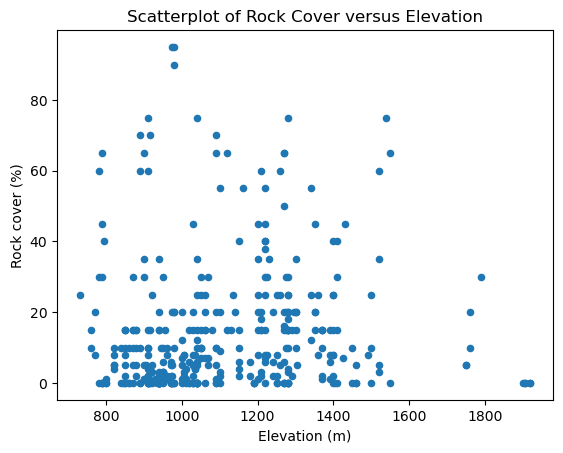

In [43]:
''' Start with a simple scatterplot. At first glance, there does not seem to be a relationship between elevation and rock coverage. ''' 
from matplotlib import pyplot as plt
%matplotlib inline

sp=env.plot(x='ELEVATION', y='COVER_ROCK', kind='scatter')
plt.suptitle('')
sp.set_title('Scatterplot of Rock Cover versus Elevation')
sp.set_xlabel('Elevation (m)')
sp.set_ylabel('Rock cover (%)')
plt.savefig('scatterplot.png')

In [27]:
''' Summary statistics about both columns. Notice, there are fewer ELEVATION entries (374) than COVER_ROCK entries (439)'''
env[['ELEVATION','COVER_ROCK']].describe()

''' Turns out, there are 65 unknown elevations (np.NaN)'''
env['ELEVATION'].isna().sum() # 65

65

In [28]:
''' And, when elevation is unknown, rock coverage tends to be low, also. 75% of unknown elevations correspond to 15% or less rock coverage.'''
env[env['ELEVATION'].isna()==True]['COVER_ROCK'].describe()

count    65.000000
mean     10.384615
std      14.605962
min       0.000000
25%       0.000000
50%       5.000000
75%      15.000000
max      70.000000
Name: COVER_ROCK, dtype: float64

##### Rather than a scatterplot, draw a set of boxplots against complete data (elevation and rock coverage are both known). Bin the coverage percentages into deciles (percentiles that are multiples of '10').

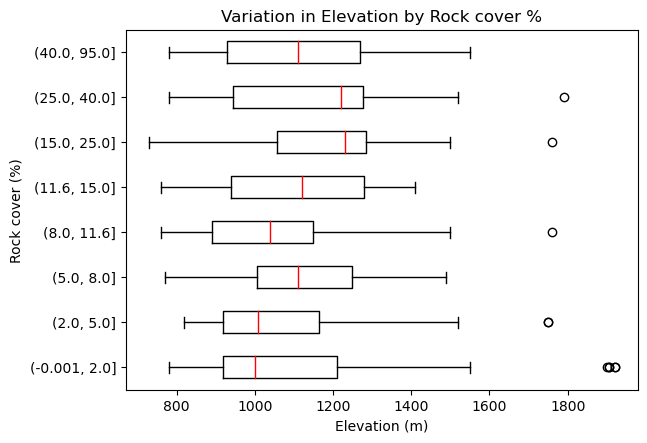

In [44]:
from matplotlib import pyplot as plt
%matplotlib inline 

complete_data = env[env['ELEVATION'].isna()==False][['ELEVATION','COVER_ROCK']]
complete_data['COVER_DECILE'] = pd.qcut(complete_data['COVER_ROCK'],10, duplicates='drop')
bp = complete_data.boxplot(column='ELEVATION', by='COVER_DECILE', 
                           color=dict(boxes='k', whiskers='k', medians='r', caps='k'), vert=False)
bp.grid(False)
plt.suptitle('')
bp.set_title('Variation in Elevation by Rock cover %')
bp.set_xlabel('Elevation (m)')
bp.set_ylabel('Rock cover (%)')
plt.savefig('Rock Boxplot.png')

#### The overlap between boxplot whiskers is so similar, and the respective medians (green lines inside each box) do not trend strongly higher or lower as rock
#### coverage rises. I conclude the is *no relationship* between ELEVATION and ROCK COVERAGE.
##### Make a figure showing the distribution of the "totals" column you created in the species data frame. 

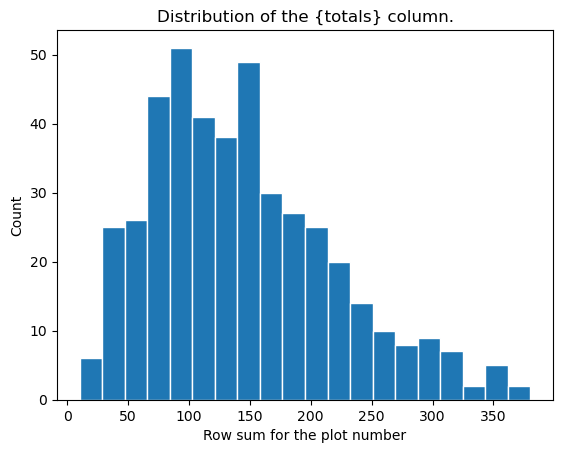

In [45]:
hist = orig_species['totals'].hist(bins=20, edgecolor='w') #give the bars a white outline
hist.set_title('Distribution of the {totals} column.')
hist.set_xlabel('Row sum for the plot number')
hist.set_ylabel('Count')
hist.grid(False) #remove the gridlines
plt.savefig('totals_column_histogram.png')


##### Print summary statistics for this column, as well. 

In [35]:
orig_species['totals'].describe()

count    439.000000
mean     144.146469
std       74.729961
min       10.000000
25%       87.000000
50%      132.000000
75%      188.250000
max      380.500000
Name: totals, dtype: float64

##### Create a subset of env containing rows with the plant community names "Caricetum scirpoideae-rupestris","Pedicularo kanei-Caricetum glacialis", and "Saxifrago tricuspidatae-Artemisietum alaskanae"

In [36]:
plant_subset = env[env['PLANT_COMMUNITY_NAME'].isin(["Caricetum scirpoideae-rupestris","Pedicularo kanei-Caricetum glacialis","Saxifrago tricuspidatae-Artemisietum alaskanae"])]
plant_subset.shape

(42, 11)

##### Create a figure to compare the mean cover bare soil percentage of the plant communities. Describe what the figure tells us-> 
##### are there differences among the plant communities in cover bare soil percentage? Which has the highest median value? The lowest? Are there differences in the spread among the communities?

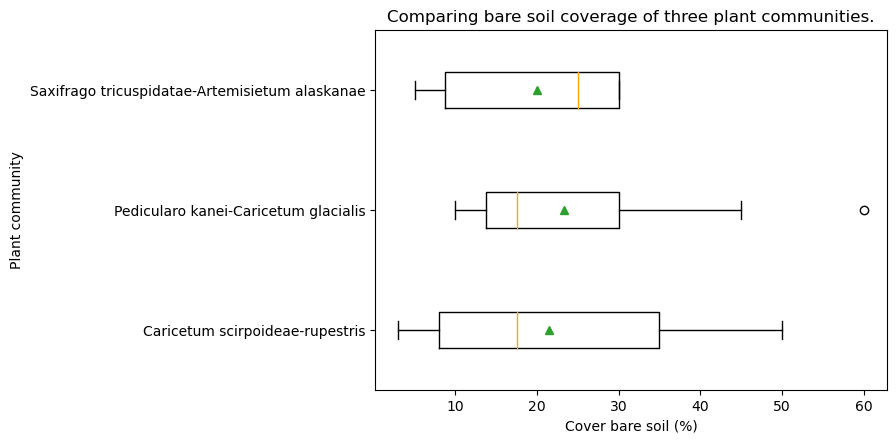

In [46]:
from matplotlib import pyplot as plt
%matplotlib inline 
bp = plant_subset.boxplot(column='COVER_BARE_SOIL', by='PLANT_COMMUNITY_NAME', vert=False, 
                          color=dict(boxes='k', whiskers='k', medians='orange', caps='k'), showmeans=True)
bp.grid(False)
plt.suptitle('')
bp.set_title('Comparing bare soil coverage of three plant communities.')
bp.set_xlabel('Cover bare soil (%)')
bp.set_ylabel('Plant community')
plt.savefig('plant_boxplot.png')

#### In each boxplot, the median coverage is the |, and mean coverage is the triangle. S.t-A.a (abbreviated) has the highest median bare soil coverage; P.k-C.g and C.s-r are tied for the lowest median coverage. However, P.k-C.g has the highest *mean* coverage. There are differences between the communities: S.t-A.a never exceeds 30% coverage; C.s-r has the greatest spread in coverage. ####

In [38]:
( plant_subset[plant_subset['PLANT_COMMUNITY_NAME']=="Pedicularo kanei-Caricetum glacialis"]['COVER_BARE_SOIL'].median(),
plant_subset[plant_subset['PLANT_COMMUNITY_NAME']=="Caricetum scirpoideae-rupestris"]['COVER_BARE_SOIL'].median() )

(17.5, 17.5)